<a href="https://colab.research.google.com/github/liamsebestyen/Machine-Learning/blob/main/Dogs_%26_Cats_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Add the relevant libraries!

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Add the dataset of dogs & cats (Thank you Kaggle!)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

100%|██████████| 64.4M/64.4M [00:00<00:00, 73.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4


Create the data generator

In [ ]:
print(path)
train_gen = ImageDataGenerator(
    rescale = 1.0/255, #Neural Networks work much better with values 0 to 1
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

val_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2
)

training_path = path + "/train"
train_data = train_gen.flow_from_directory(
    training_path,
    target_size = (128,128),
    batch_size = 16,
    class_mode = "binary"
)

validation_path = path + "/test"

val_data = val_gen.flow_from_directory(
    validation_path,
    target_size =(128,128),
    batch_size = 16,
    class_mode = "binary"
    )









/root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


Build the model!

In [ ]:
model = tf.keras.Sequential([
        tf.keras.Input(shape= (128,128,3)),
        tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),#This is doing the convolution, giving some information
        #for the input, and then doing maxPooling to speed training

        tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
        tf.keras.layers.MaxPooling2D((2,2)),


        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(1,activation= "sigmoid")
])


model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

model.summary()






Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the model (best part)!

In [ ]:
trained_model = model.fit(
    train_data,
    validation_data = val_data,
    epochs = 5
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 823ms/step - accuracy: 0.5034 - loss: 0.8469 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 758ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 765ms/step - accuracy: 0.4908 - loss: 0.6932 - val_accuracy: 0.5071 - val_loss: 0.6928
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 775ms/step - accuracy: 0.5183 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 798ms/step - accuracy: 0.4861 - loss: 0.6923 - val_accuracy: 0.5643 - val_loss: 0.6810


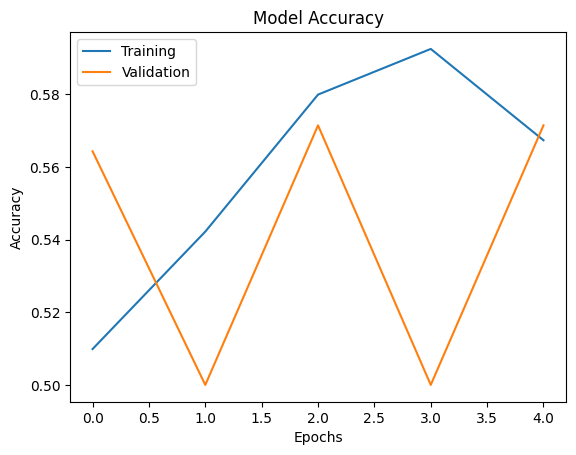

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.5941 - loss: 0.7167
Validation Accuracy: 0.6214


In [ ]:
plt.plot(trained_model.history["accuracy"])
plt.plot(trained_model.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.show()


val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc:.4f}")


Check the training results

Test with predictions

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image_path ="/root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4/test/dogs/dog_114.jpg"
img = image.load_img(test_image_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)

if pred[0][0] > 0.5:
  print("Dog")
else:
  print("Cat")


print(pred[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Dog
0.53371364
